In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Transformed Image')

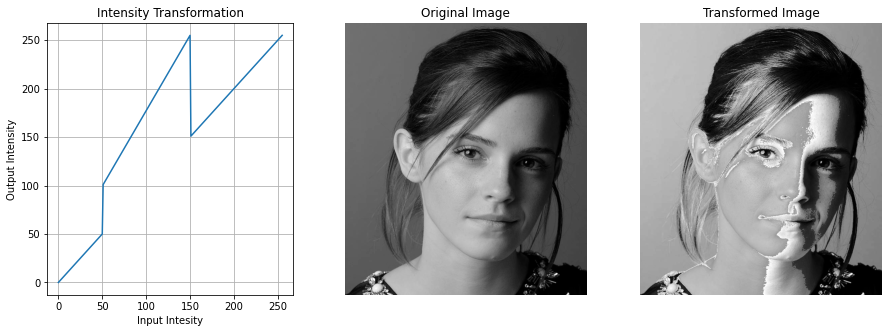

In [17]:
emma_img_gray = cv.imread(r"Images\emma_gray.jpg", cv.IMREAD_GRAYSCALE)

section_1 = np.linspace(0, 50, 51)
section_2 = np.linspace(101, 255, 100)
section_3 = np.linspace(151, 255, 105)

intensity_transform = np.concatenate((section_1, section_2, section_3), axis=0)

emma_img_gray_transformed = cv.LUT(emma_img_gray, intensity_transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(intensity_transform)
ax[0].set_xlabel("Input Intesity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_title("Intensity Transformation")
ax[0].grid()

ax[1].imshow(emma_img_gray, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Original Image")

ax[2].imshow(emma_img_gray_transformed, cmap = "gray")
ax[2].axis('off')
ax[2].set_title("Transformed Image")


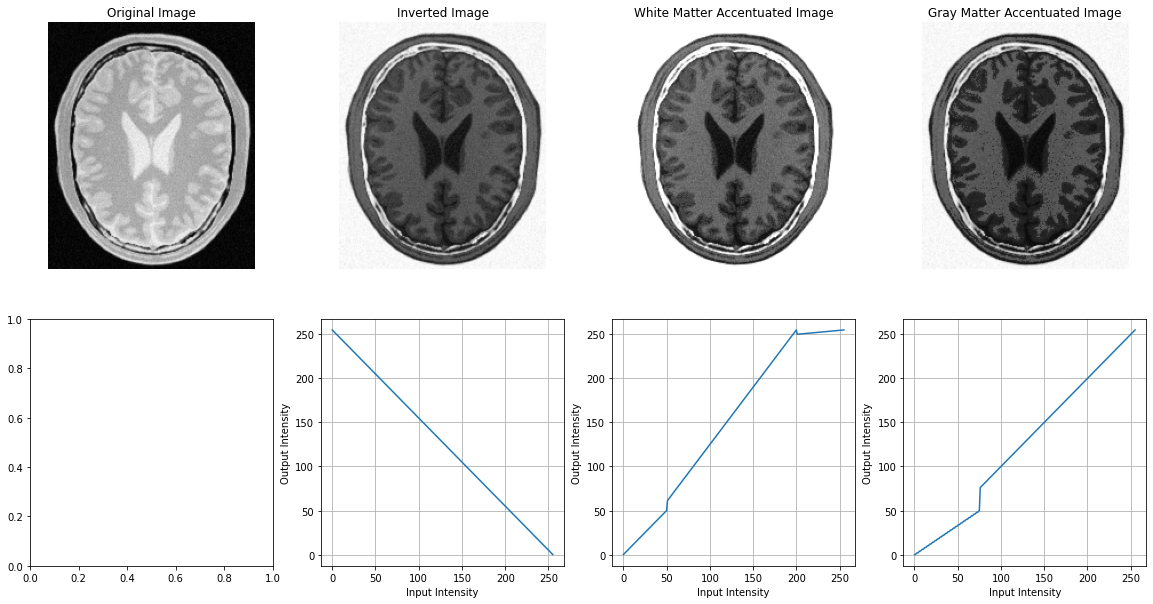

In [59]:
brain_img = cv.imread(r"Images\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

#inversion
invert = np.array([i for i in range(255, -1, -1)]).astype(np.uint8)

#white matter
segment_1 = np.array([i for i in range(0, 51)])
segment_2 = np.array([1.3*i - 5 for i in range(51, 201)])
segment_3 = np.array([i/11 + 231.81 for i in range(201, 256)])
white_matter_transform = np.concatenate((segment_1, segment_2, segment_3), axis=0)

#gray matter transform
segment_1_gray = np.array([2*i/3 for i in range(0, 76)]).astype(np.uint8)
segment_2_gray = np.array([i for i in range(76, 256)]).astype(np.uint8) #1.323*i - 82.25
gray_matter_transform = np.concatenate((segment_1_gray, segment_2_gray), axis=0)

# Intensity transformation
brain_img_invert = cv.LUT(brain_img, invert)
brain_img_white_matter = cv.LUT(brain_img_invert, white_matter_transform)
brain_img_gray_matter = cv.LUT(brain_img_invert, gray_matter_transform)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0][0].imshow(brain_img, cmap = "gray", vmax = 255, vmin = 0)
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].imshow(brain_img_invert, cmap = "gray", vmax = 255, vmin = 0)
ax[0][1].set_title("Inverted Image")
ax[0][1].axis('off')

ax[0][2].imshow(brain_img_white_matter, cmap = "gray")
ax[0][2].set_title("White Matter Accentuated Image")
ax[0][2].axis('off')

ax[0][3].imshow(brain_img_gray_matter, cmap = "gray")
ax[0][3].set_title("Gray Matter Accentuated Image")
ax[0][3].axis('off')

#Transform plots
ax[1][1].plot(invert)
ax[1][1].set_xlabel("Input Intensity")
ax[1][1].set_ylabel("Output Intensity")
ax[1][1].grid()

ax[1][2].plot(white_matter_transform)
ax[1][2].set_xlabel("Input Intensity")
ax[1][2].set_ylabel("Output Intensity")
ax[1][2].grid()

ax[1][3].plot(gray_matter_transform)
ax[1][3].set_xlabel("Input Intensity")
ax[1][3].set_ylabel("Output Intensity")
ax[1][3].grid()